In [1]:
import numpy as np
import sep
from astropy.io import fits
from astropy.utils.data import download_file
from matplotlib import rcParams
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [2]:
data_f105w = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

hdu_2 = fits.open(data_f105w)

data_2 = hdu_2[0].data

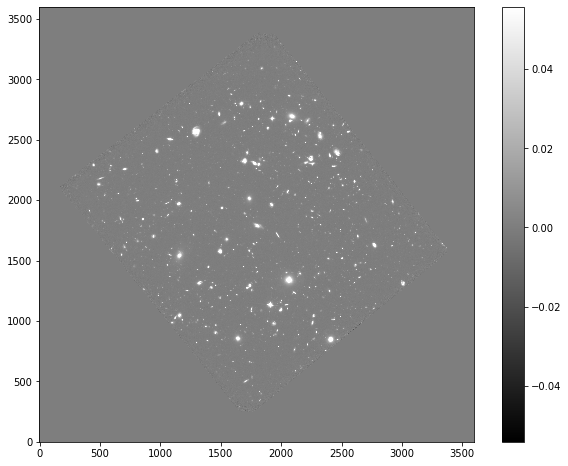

In [3]:
m, s = np.mean(data_2), np.std(data_2)
plt.imshow(data_2, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [4]:
data_2b = data_2.byteswap().newbyteorder()
bkg = sep.Background(data_2b)
print(bkg.globalback)
print(bkg.globalrms)
bkg_image = bkg.back()

0.0
0.0005398219218477607


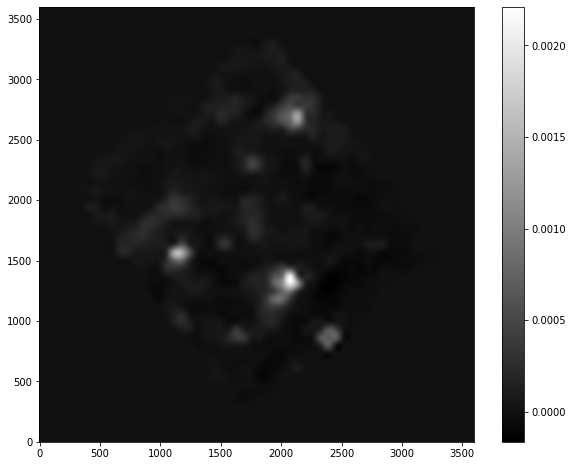

In [5]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [6]:
bkg_rms = bkg.rms()

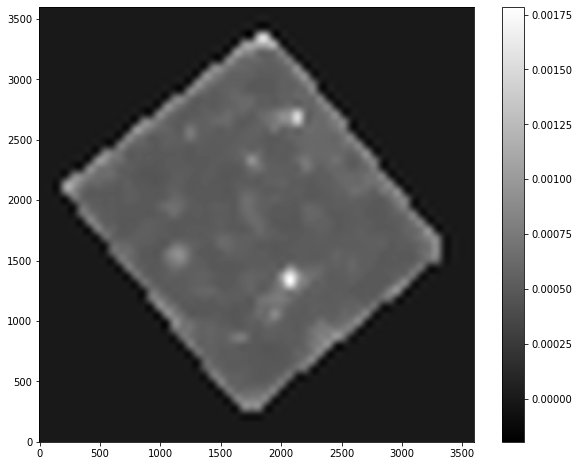

In [7]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [8]:
data_sub = data_2b - bkg
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [9]:
len(objects)

8636

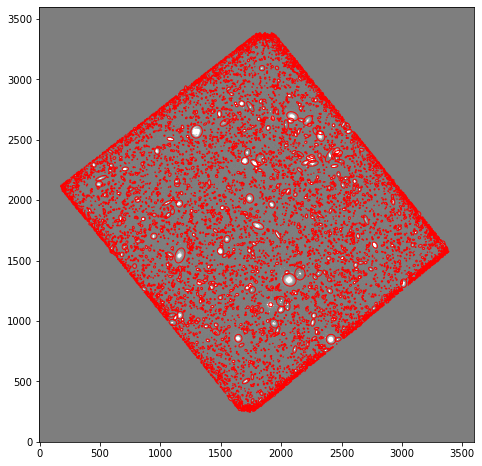

In [10]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [11]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [12]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [13]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


In [14]:
print(f"there are {len(objects)} sources detected")

there are 8636 sources detected


Text(0, 0.5, 'Detections')

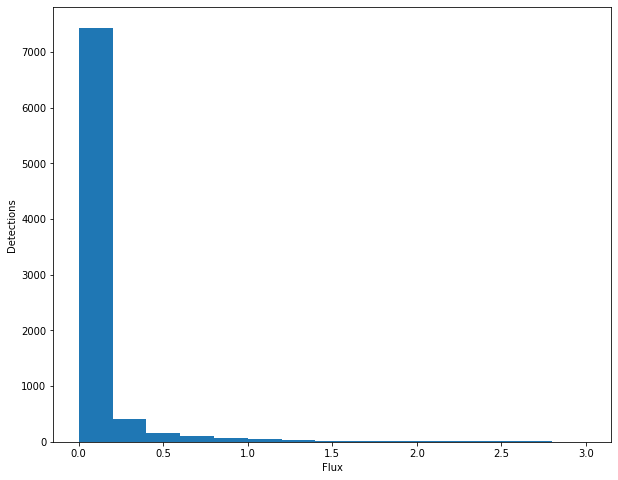

In [15]:
plt.hist(flux, bins=15, range=(0,3))
plt.xlabel("Flux")
plt.ylabel("Detections")

In [16]:
print(f"Mean Flux: {np.mean(flux)}")
print(f"Median Flux: {np.median(flux)}")
print(f"Standard Deviation: {np.std(flux)}")
print(f"Largest Outlier: {np.max(flux)}")
print(f"The Largest Outlier is {(np.max(flux)-np.mean(flux))/np.std(flux)} Standard Deviations away from the mean.")

Mean Flux: 0.3620178123990992
Median Flux: 0.03097589430617518
Standard Deviation: 9.245665478260847
Largest Outlier: 807.2972835731507
The Largest Outlier is 87.27714274954926 Standard Deviations away from the mean.
